In [1]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

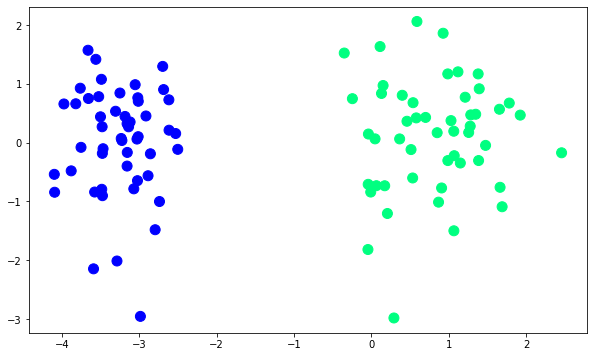

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter', s=100)

In [4]:
def perceptron(X,y):
    
    X =  np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
        
    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0

In [5]:
intercept_,coef_ = perceptron(X,y)

In [6]:
print(coef_)
print(intercept_)

[1.05343617 0.2221512 ]
1.3000000000000003


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

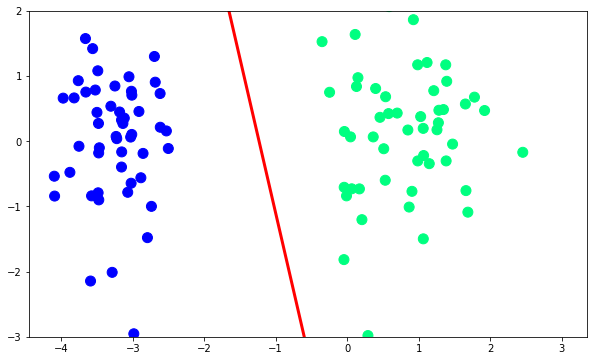

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter', s=100)
plt.ylim(-3,2)

In [20]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\Gaurav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [21]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [22]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

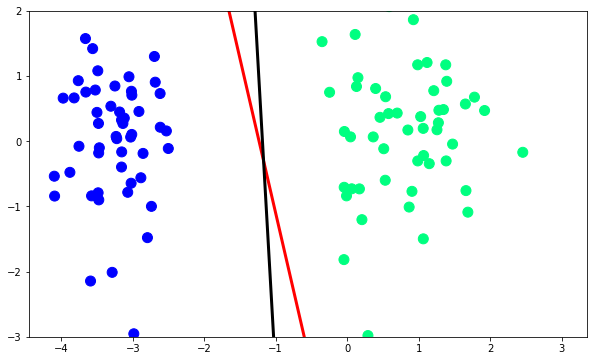

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter', s=100)
plt.ylim(-3,2)

In [24]:
def perceptron(X,y):
    
    X =  np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
        
    return weights[0],weights[1:]

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [25]:
intercept_,coef_ = perceptron(X,y)

In [26]:
print(coef_)
print(intercept_)

[2.83303275 0.06553529]
2.8358257020097914


In [27]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [28]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input1 + b

(-3.0, 2.0)

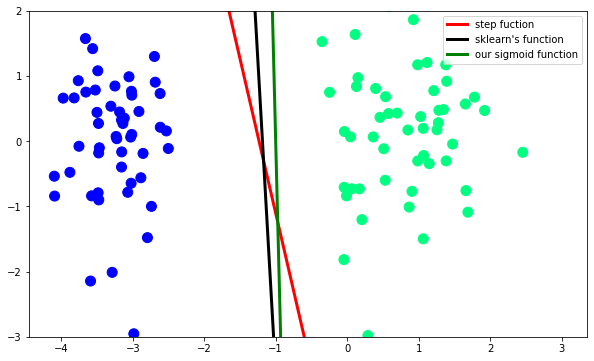

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='step fuction')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label="sklearn's function")
plt.plot(x_input2,y_input2,color='green',linewidth=3,label='our sigmoid function')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter', s=100)
plt.legend()
plt.ylim(-3,2)

In [33]:
def gd(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(2500):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [34]:
coef_,intercept_ = gd(X,y)

In [35]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [37]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input1 + b

(-3.0, 2.0)

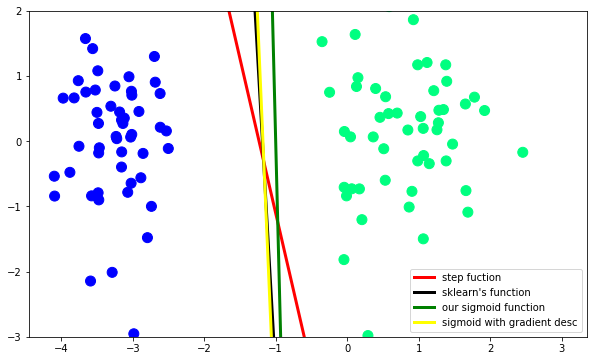

In [39]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='step fuction')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label="sklearn's function")
plt.plot(x_input2,y_input2,color='green',linewidth=3,label='our sigmoid function')
plt.plot(x_input3,y_input3,color='yellow',linewidth=3,label='sigmoid with gradient desc')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter', s=100)
plt.legend()
plt.ylim(-3,2)